# Midterm Presentation

Friday, March 4th, 2022.
Luis David Vega Toral.
A00571517.
IN2039.102

Database used in this document:

Indicadores internacionales del World Bank https://data.worldbank.org/indicator

## Dataset

In [1]:
%ls datasets/

adult.csv                  census.csv     movies.csv
airline_data.csv           coches.csv     nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv   pokemon.csv
antropometria-dataset.csv  data.csv       reg_data.csv
Book3.csv                  headbrain.csv  sample_pivot.csv
Canada.xlsx                mic2.xlsx      tips.csv
Cartwheeldata.csv          mic.xlsx       weight-height.csv


## Libraries to use:

In [25]:
#pip install matplotlib 

In [26]:
#pip install xlrd

In [27]:
#pip install seaborn

In [28]:
#pip install openpyxl

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Opening the data

In [7]:
path = 'datasets/adult.csv'
df = pd.read_csv(path)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,the label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Description of dataset

This dataset shows different variables for people in different countries, such as their age, their level of education, and their working hours.

## Description of the variables

`age` is a numerical variable that represents the age of a person.

`education`is a categorical variable that represents the degree that a person has acquired in a school-level basis.

`education-num`is a numerical variable that references towards the `education`variable.

`marital-status`is a categorical variable that represents whether the person is married, divorced, etc.

`occupation`is a categorical variable that represents the person's proffession.

`sex`is a categorical variable that represents whether the person is a male or a female.

`native-country` is a categorical variable that represents the country of origin of a person.

## Analyzing the data

This dataset displays the age, marital-status, sex, native-country, and degree of education of a person, which can be very interesting to analyze in order to discover whether these factors present a tendency or not according to variables of interest (like age and country of origin).

### 1. Is there a relation between the level of education and age?

In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'the label'],
      dtype='object')

In [9]:
myPivot = pd.pivot_table(df,
                         index = ['education'],
                         values= ['age'],
                         aggfunc = ['mean'],
                         #aggfunc en python average es el default en pivot table y en excel es la suma
                        
                        )

pd.set_option('display.max_rows',5000)

myPivot

,mean
,age
education,
10th,37.429796
11th,32.355745
12th,32.000000
1st-4th,46.142857
5th-6th,42.885886
7th-8th,48.445820
9th,41.060311
Assoc-acdm,37.381443


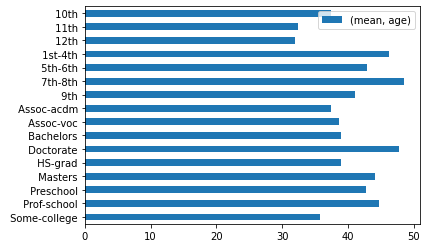

In [10]:
from matplotlib import ticker
ax = myPivot.plot(
     kind='barh', stacked=True,
     title=''
 )

ax.invert_yaxis()

# formatting

ax.set(xlabel='', ylabel='')
ax.legend(title='')

#### It appears there is no obvious relation between age and level of education of a person.

### 2. Is there a relation between marital-status and level of education?

In [11]:
myPivot = pd.pivot_table(df,
                         index = ['marital-status'],
                         values= ['education-num'],
                         aggfunc = ['median'],
                         #aggfunc en python average es el default en pivot table y en excel es la suma
                        
                        )

pd.set_option('display.max_rows',5000)

myPivot

,median
,education-num
marital-status,
Divorced,10
Married-AF-spouse,9
Married-civ-spouse,10
Married-spouse-absent,9
Never-married,10
Separated,9
Widowed,9
test_category_female,9


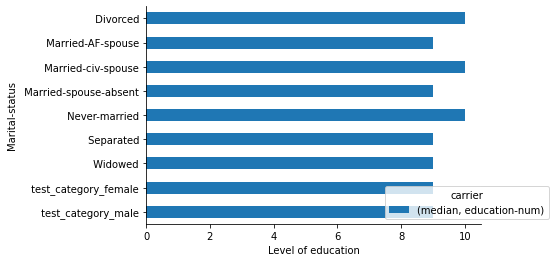

In [12]:
from matplotlib import ticker
ax = myPivot.plot(
     kind='barh', stacked=True,
     title=''
 )

ax.invert_yaxis()

# formatting

ax.set(xlabel='Level of education', ylabel='Marital-status')
ax.legend(title='')

# shift legend to not cover the bars

ax.legend(title='carrier', bbox_to_anchor=(0.7, 0), loc='lower left') 

for spine in ['top', 'right']:
     ax.spines[spine].set_visible(False)

#### It appears there is no obvious relation between marital-status and level of education of a person, however, I find it interesting that people that are divorced and that have never married do have the highest levels of education.

* Sidenote-Joke (it appears that being smart has its downsides in life)

### 3. Do the hours people work affect their salary?

In [23]:
myPivot = pd.pivot_table(df,
                         index = ['hours-per-week'],
                         values= ['capital-gain'],
                         aggfunc = ['mean'],
                         #aggfunc en python average es el default en pivot table y en excel es la suma
                        
                        )

#pd.set_option('display.max_rows',5000)

#myPivot

Text(0, 0.5, 'Income')

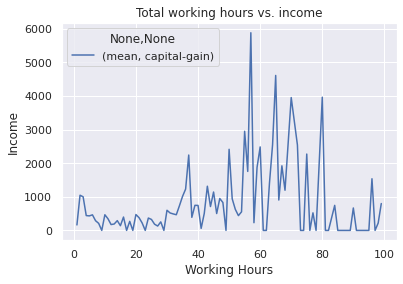

In [21]:
sns.set()  # use Seaborn styles
df.pivot_table(index = ['hours-per-week'],
                         values= ['capital-gain'],
                         aggfunc = ['mean'],).plot()
plt.title('Total working hours vs. income')
plt.xlabel('Working Hours')
plt.ylabel('Income')

#### There seems to be a tendency in which, the higher the hours worked, the highr the salary, but with what appears to be a normal distribution.

## Problems I have faced during this activity:

It appears that the libraries we have been using in class have some troble graphing categorical data, which is why I decided to do some external research on how to graph them, for I was interested in knowing information that related, for example, two categorical data. This lead me to use graphs based on pivot tables, which I found out to be very interesting. Also, I intended to initially use data from the World Bank Database, yet my Jupyter notebook couldn't seem to be able to open my file, so I went with this one instead.

## References

* https://opendatascience.com/how-to-pivot-and-plot-data-with-pandas/
* https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html